In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)
fontsize = 18
figsize = (8, 6)
import seaborn as sns
sns.set_context("talk")
import unconstr_solvers as solvers
import step_size as ss
import utils
import scipy.optimize as scopt

## Quadratic convex functions

### Matrix with high condition number and uniform distributed spectrum

Condition number = 50.00000000000024


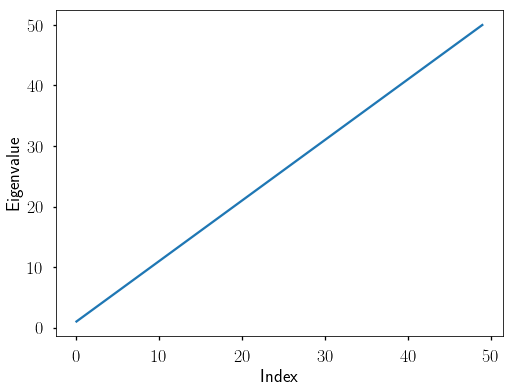

In [2]:
n = 50
D = np.arange(1, n+1)
U = np.random.randn(n, n)
U, _ = np.linalg.qr(U)
A = U.dot(np.diag(D)).dot(U.T)
b = np.random.randn(n)
eig_vals = np.linalg.eigvals(A)
print("Condition number = {}".format(np.max(eig_vals) / np.min(eig_vals)))
plt.figure(figsize=figsize)
plt.plot(np.sort(eig_vals))
plt.xlabel("Index", fontsize=fontsize)
plt.ylabel("Eigenvalue", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [3]:
f = lambda x: 0.5 * x.T.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
hess_f = lambda x: A

In [4]:
m_dict = {
     "GD": solvers.GradientDescent(f, grad_f, ss.ExactLineSearch4Quad(A, b)),
     "Newton": solvers.Newton(f, grad_f, hess_f, ss.ExactLineSearch4Quad(A, b)),
     "CG quad": solvers.ConjugateGradientQuad(A, b),
     "CG FR": solvers.ConjugateGradientFR(f, grad_f, ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
     "BB 1": solvers.BarzilaiBorwein(f, grad_f, init_alpha=1e-4, type=1),
    }

In [5]:
x0 = np.random.rand(n)
tol = 1e-6
max_iter = 100

In [6]:
for key in m_dict:
    print("\t {}".format(key))
    _ = m_dict[key].solve(x0, max_iter, tol, disp=True)

	 GD
Convergence in 100 iterations
Norm of gradient = 0.01970657200654713
Function value = -1.9375466451009626
	 Newton
Convergence in 1 iterations
Norm of gradient = 5.1035616197824766e-14
Function value = -1.937637068045569
	 CG quad
Convergence in 36 iterations
Norm of gradient = 8.997598162772348e-07
Function value = -1.9376370680455504
	 CG FR
Convergence in 82 iterations
Norm of gradient = 9.076876520763314e-07
Function value = -1.9376370680455302
	 BB 1
Convergence in 78 iterations
Norm of gradient = 4.6950415221225766e-07
Function value = -1.9376370680455404


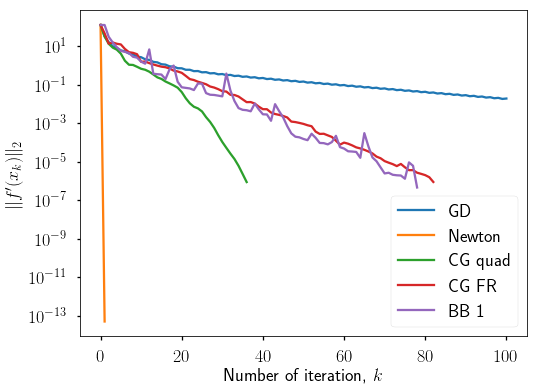

In [7]:
plt.figure(figsize=figsize)
for key in m_dict:
    plt.semilogy([np.linalg.norm(grad_f(x)) for x in m_dict[key].get_convergence()], label=key)
plt.legend(fontsize=18)
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [8]:
for key in m_dict:
    print("\t {}".format(key))
    %timeit m_dict[key].solve(x0, max_iter, tol)

	 GD
1.78 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
	 Newton
56.1 µs ± 2.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
	 CG quad
743 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
	 CG FR
6.74 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
	 BB 1
1.13 ms ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Matrix with high condition number and clusterized spectrum

Condition number = 1000.0000000007229


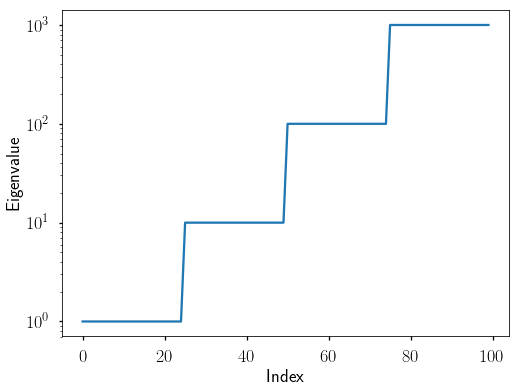

In [9]:
n = 100
A = np.diagflat([np.ones(n//4), 10 * np.ones(n//4), 100*np.ones(n//4), 1000* np.ones(n//4)])
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5
b = np.random.randn(n)
eig_vals = np.linalg.eigvalsh(A)
print("Condition number = {}".format(max(eig_vals) / min(eig_vals)))
plt.figure(figsize=figsize)
plt.semilogy(np.sort(eig_vals))
plt.xlabel("Index", fontsize=fontsize)
plt.ylabel("Eigenvalue", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [10]:
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
x0 = np.zeros(n)

In [11]:
m_dict = {
     "GD": solvers.GradientDescent(f, grad_f, ss.ExactLineSearch4Quad(A, b)),
     "Newton": solvers.Newton(f, grad_f, hess_f, ss.ExactLineSearch4Quad(A, b)),
     "CG quad": solvers.ConjugateGradientQuad(A, b),
     "CG FR": solvers.ConjugateGradientFR(f, grad_f, ss.Backtracking("Wolfe strong", rho=0.5, beta1=0.1, beta2=0.7,
                                                                     init_alpha=1.), utils.Restart(10)),
     "BB 1": solvers.BarzilaiBorwein(f, grad_f, init_alpha=1e-4, type=1),
    }

In [12]:
x0 = np.random.rand(n)
tol = 1e-6
max_iter = 100

In [13]:
for key in m_dict:
    print("\t {}".format(key))
    _ = m_dict[key].solve(x0, max_iter, tol, disp=True)

	 GD
Convergence in 100 iterations
Norm of gradient = 11.923643025149515
Function value = -1.440320057620216
	 Newton
Convergence in 1 iterations
Norm of gradient = 1.094103793025008e-12
Function value = -10.361702771584019
	 CG quad
Convergence in 4 iterations
Norm of gradient = 8.382888214304665e-07
Function value = -10.361702771583989
	 CG FR
Convergence in 100 iterations
Norm of gradient = 0.1413033491168342
Function value = -10.360141553265695
	 BB 1
Convergence in 82 iterations
Norm of gradient = 7.915537304041064e-08
Function value = -10.361702771584135


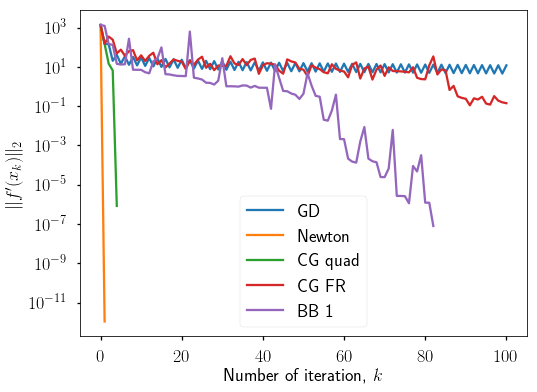

In [14]:
plt.figure(figsize=figsize)
for key in m_dict:
    plt.semilogy([np.linalg.norm(grad_f(x)) for x in m_dict[key].get_convergence()], label=key)
    plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

In [15]:
for key in m_dict:
    print("\t {}".format(key))
    %timeit m_dict[key].solve(x0, max_iter, tol)

	 GD
2.19 ms ± 21.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
	 Newton
132 µs ± 6.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
	 CG quad
90.3 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
	 CG FR
15.2 ms ± 92.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
	 BB 1
1.43 ms ± 7.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Analytical center of the set of inequalities

In [16]:
n = 1000
m = 500
A = np.random.rand(n, m) * 10

In [17]:
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), \
                          axis=1) + 2 * x / (1 - np.power(x, 2))

hess_f = lambda x: (A.dot(np.diagflat(1 / (1 - A.T.dot(x))**2))).dot(A.T) + np.diagflat(2 * (1 + x**2) / (1 - x**2)**2)

In [18]:
m_dict = {
     "GD": solvers.GradientDescent(f, grad_f, ss.Backtracking("Armijo", beta=0.1, rho=0.5, init_alpha=1.)),
     "Newton": solvers.Newton(f, grad_f, hess_f, ss.Backtracking("Armijo", beta=0.1, rho=0.5, init_alpha=1.)),
     "CG FR": solvers.ConjugateGradientFR(f, grad_f, ss.Backtracking("Armijo", beta=0.1, rho=0.5, init_alpha=1.), utils.Restart(10)),
     "BB 1": solvers.BarzilaiBorwein(f, grad_f, init_alpha=1e-4, type=1),
    }

In [19]:
x0 = np.zeros(n)
tol = 1e-5
max_iter = 100

In [20]:
for key in m_dict:
    print("\t {}".format(key))
    _ = m_dict[key].solve(x0, max_iter, tol, disp=True)

	 GD


/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Convergence in 25 iterations
Norm of gradient = 7.115539300596095e-06
Function value = -3633.651249378586
	 Newton
Convergence in 14 iterations
Norm of gradient = 1.5725274994334615e-08
Function value = -3633.65124937859
	 CG FR
Convergence in 17 iterations
Norm of gradient = 5.379163507196688e-06
Function value = -3633.6512493785876
	 BB 1
Convergence in 9 iterations
Norm of gradient = 5.383646509359192e-06
Function value = -3633.651249378587


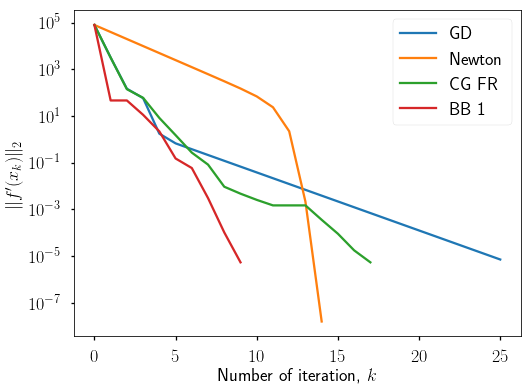

In [21]:
plt.figure(figsize=figsize)
for key in m_dict:
    plt.semilogy([np.linalg.norm(grad_f(x)) for x in m_dict[key].get_convergence()], label=key)
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

In [22]:
for key in m_dict:
    print("\t {}".format(key))
    %timeit m_dict[key].solve(x0, max_iter, tol)

	 GD


/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


417 ms ± 4.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
	 Newton
711 ms ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
	 CG FR


/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


302 ms ± 7.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
	 BB 1
91.5 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Toy logistic regression with L2 regularization

In [23]:
import numpy as np
import sklearn.datasets as skldata
import scipy.special as scspec

n = 300
m = 1000

X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3)
C = 1

def f(w):
    return np.linalg.norm(w)**2 / 2 +  C * np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

def grad_f(w):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]

def hess_f(w):
    denom = scspec.expit(-y * X.dot(w))
    d = y**2 * denom**2
    return np.eye(n) + C * (X.T * d).dot(X) / X.shape[0]

x0 = np.zeros(n)
print("Initial function value = {}".format(f(x0)))
print("Initial gradient norm = {}".format(np.linalg.norm(grad_f(x0))))

Initial function value = 0.6931471805599454
Initial gradient norm = 2.1661738072849333


In [24]:
m_dict = {
     "GD": solvers.GradientDescent(f, grad_f, ss.Backtracking("Armijo", beta=0.1, rho=0.5, init_alpha=1.)),
     "Newton": solvers.Newton(f, grad_f, hess_f, ss.Backtracking("Armijo", beta=0.1, rho=0.5, init_alpha=1.)),
     "CG FR": solvers.ConjugateGradientFR(f, grad_f, ss.Backtracking("Armijo", beta=0.1, rho=0.5, init_alpha=1.), utils.Restart(10)),
     "BB 1": solvers.BarzilaiBorwein(f, grad_f, init_alpha=1e-4, type=1),
    }

In [25]:
x0 = np.zeros(n)
tol = 1e-5
max_iter = 100

In [26]:
for key in m_dict:
    print("\t {}".format(key))
    _ = m_dict[key].solve(x0, max_iter, tol, disp=True)

	 GD
Convergence in 100 iterations
Norm of gradient = 0.0018121555058293176
Function value = 0.480798578163266
	 Newton
Convergence in 42 iterations
Norm of gradient = 9.891732728897187e-06
Function value = 0.4807976310570059
	 CG FR
Convergence in 53 iterations
Norm of gradient = 5.610228199478922e-06
Function value = 0.4807976310606389
	 BB 1
Convergence in 58 iterations
Norm of gradient = 2.3466879343443794e-06
Function value = 0.48079763105710005


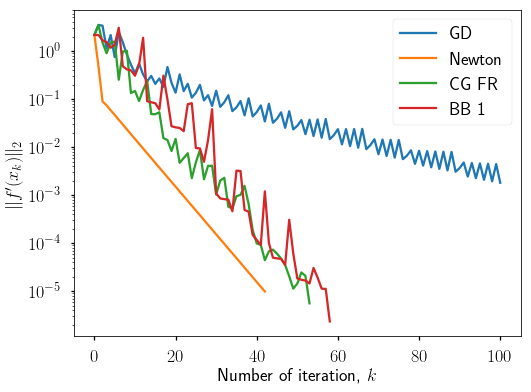

In [27]:
plt.figure(figsize=figsize)
for key in m_dict:
    plt.semilogy([np.linalg.norm(grad_f(x)) for x in m_dict[key].get_convergence()], label=key)
plt.legend(fontsize=fontsize)
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [28]:
for key in m_dict:
    print("\t {}".format(key))
    %timeit m_dict[key].solve(x0, max_iter, tol)

	 GD
163 ms ± 9.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
	 Newton
217 ms ± 3.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
	 CG FR
82.5 ms ± 3.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
	 BB 1
15 ms ± 216 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
